<a href="https://colab.research.google.com/github/dotdak/Hackathon/blob/master/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!curl --output train.zip https://dl.challenge.zalo.ai/ZaloAIHackathon2019/zai2019_hackathon_train.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  255M  100  255M    0     0  11.2M      0  0:00:22  0:00:22 --:--:-- 13.3M


In [0]:
import cv2
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
BASE_PATH = 'zai2019_hackaton_train/'
IMAGES_PATH = BASE_PATH + 'images/train/'
ANNOTATION = BASE_PATH + 'annotations/ninedash_keypoints_train.json'

In [19]:
%cd 'content/drive/My Drive/Hackathon'

[Errno 2] No such file or directory: 'content/drive/My Drive/Hackathon'
/content


In [8]:
!7z x train.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 267876678 bytes (256 MiB)

Extracting archive: train.zip
--
Path = train.zip
Type = zip
Physical Size = 267876678

  0%      5% 224 - zai2019_hackaton_train/images/train/222.jpg                                                       10% 424 - zai2019_hackaton_train/images/train/422.jpg                                                       16% 539 - zai2019_hackaton_train/images/train/537.jpg                                                      

In [0]:
annotations = pd.read_csv('annotations.csv', index_col = 'id')
images = pd.read_csv('images.csv', index_col = 'id')

In [0]:
images_1 = cv2.imread(IMAGES_PATH + images['file_name'][0])
box_1 = annotations['bbox'][0]

In [0]:
box_1 = [box_1[1:-1]]
box_1 = box_1.split(',')
box_1 = [int(i) for i in box_1]

In [44]:
box_1

[388, 130, 447, 599]

In [0]:
[a,b,c,d] = box_1
start_point = (a, b)
end_point = (c, d)
thickness = 2
color = (255, 0, 0)

In [47]:
cv2.imwrite('test.jpg', images_1[b:b+d, a:a+c])

True

In [48]:
for annotation in annotations:
  print(annotation)
  break

area


In [0]:
# Create annotation file
save_path = 'yolobox/'
for i in images.index:
  name = images['file_name'][i]
  annotation = annotations[annotations['image_id'] == i]
  height = int(images['height'][i])
  width = int(images['width'][i])
  with open(save_path + name[:-4] + '.txt', 'w') as f:
    for j in range(len(annotation)):
      bbox = annotation.iloc[j][1]
      bbox = bbox[1:-1]
      bbox = bbox.split(',')
      bbox = [int(i) for i in bbox]
      f.write(f'0 {bbox[0]/width} {bbox[1]/height} {bbox[2]/width} {bbox[3]/height}')
      if j != len(annotation) - 1:
        f.write('\n')

In [78]:
print(len(os.listdir('yolobox/')))

2590


In [0]:
annotations.area.plot.hist

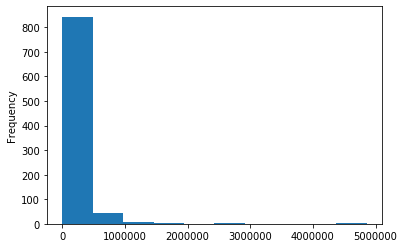

In [80]:
plt.figure()
annotations['area'].plot.hist()

In [81]:
annotations[annotations['area'] > 1000000]

,area,bbox,category_id,image_id,iscrowd,keypoints,num_keypoints,segmentation
id,,,,,,,,
12,1056341,"[578, 2, 979, 1079]",1,12,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
26,1291864,"[510, 190, 1003, 1288]",1,26,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
30,2677205,"[181, 893, 1385, 1933]",1,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
62,1003926,"[687, 221, 861, 1166]",1,60,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
96,1276600,"[536, 172, 982, 1300]",1,93,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
246,1062936,"[75, 59, 888, 1197]",1,238,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
294,1601245,"[406, 265, 1093, 1465]",1,285,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
368,1461495,"[472, 175, 1085, 1347]",1,353,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
369,1074311,"[630, 232, 919, 1169]",1,354,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,[]
